# Task 3:  Forest Cover Type Classification 
## *Description:*
1. Dataset (Recommended): Covertype (UCI).
2. Predict the type of forest cover based on cartographic and environmental features.
3. Clean and preprocess the data including categorical handling.
4. Train and evaluate multi-class classification models.
5. Visualize confusion matrix and feature importance.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [2]:
data = pd.read_csv('/kaggle/input/forest-cover-type-dataset/covtype.csv')
data.head(3)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2


In [3]:
data_reversed = data[['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5','Soil_Type6','Soil_Type7',
    'Soil_Type8', 'Soil_Type9', 'Soil_Type10','Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14','Soil_Type15', 
    'Soil_Type16', 'Soil_Type17', 'Soil_Type18','Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22','Soil_Type23', 
    'Soil_Type24', 'Soil_Type25', 'Soil_Type26','Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30','Soil_Type31', 
    'Soil_Type32', 'Soil_Type33', 'Soil_Type34','Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
    'Soil_Type39', 'Soil_Type40']].idxmax(axis=1)

data_reversed = data_reversed.str.replace('Soil_Type', '', regex=False)
data['Soil_Type'] = data_reversed

In [4]:
data = data.drop(columns=['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
        'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10','Soil_Type11', 
        'Soil_Type12', 'Soil_Type13', 'Soil_Type14','Soil_Type15', 'Soil_Type16', 'Soil_Type17',
        'Soil_Type18','Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22','Soil_Type23', 
        'Soil_Type24', 'Soil_Type25', 'Soil_Type26','Soil_Type27', 'Soil_Type28', 'Soil_Type29',
        'Soil_Type30','Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34','Soil_Type35', 
        'Soil_Type36', 'Soil_Type37', 'Soil_Type38','Soil_Type39', 'Soil_Type40'],axis=0)

In [5]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type,Soil_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,5,29
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,5,29
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,2,12
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,2,30
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,5,29


### Data Splitting for training & Testing

In [6]:
X = data.drop(columns=['Cover_Type'])
y = data['Cover_Type']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [9]:
model2 = RandomForestClassifier()
model2.fit(X_train,y_train)

RandomForestClassifier()

In [10]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

### Decision Tree & Random Forest Accuracy

In [11]:
print(f'Decision Tree Accuracy: {accuracy_score(y_test,y_pred1)*100:.2f}%')
print(f'Random Forest Accuracy: {accuracy_score(y_test,y_pred2)*100:.2f}%')

Decision Tree Accuracy: 93.27%
Random Forest Accuracy: 95.60%


### roc_auc_score for Decision Tree & Random Forest

In [12]:
y_pred_proba1 = model1.predict_proba(X_test)  
y_pred_proba2 = model2.predict_proba(X_test)  

print(f'Decision Tree ROC score: {roc_auc_score(y_test, y_pred_proba1, multi_class="ovo"):.2f}%')
print(f'Random Forest roc score: {roc_auc_score(y_test, y_pred_proba2, multi_class="ovo"):.2f}%')

Decision Tree ROC score: 0.94%
Random Forest roc score: 1.00%


### Confusion Matrix for Decision tree & Random Forest

In [13]:
cm1 = confusion_matrix(y_test,y_pred1)
cm2 = confusion_matrix(y_test,y_pred2)

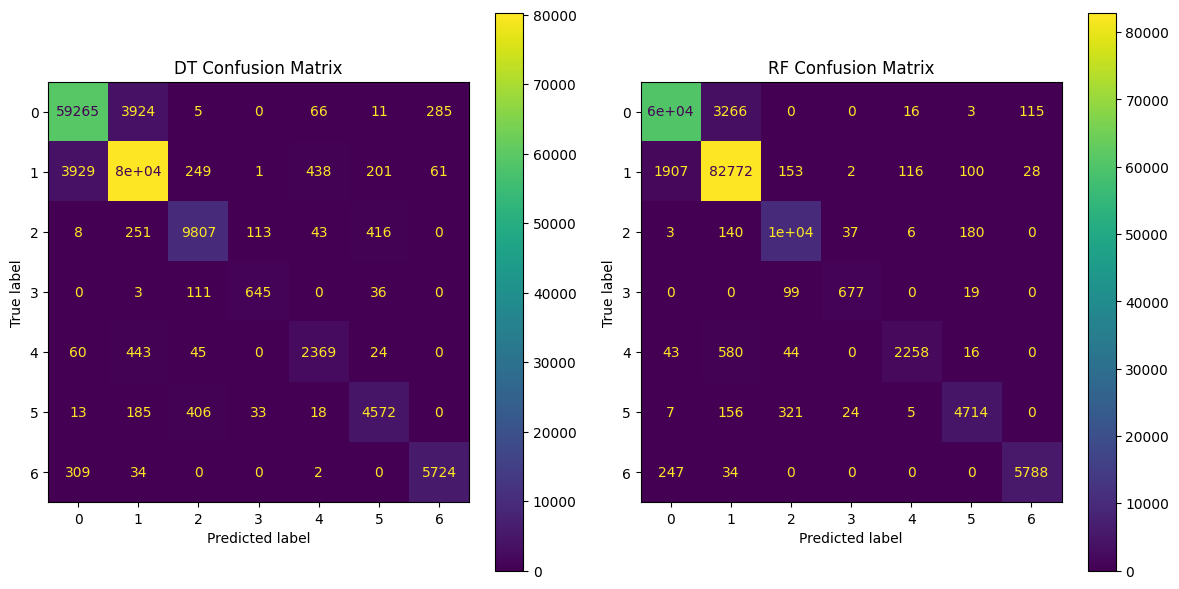

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
disp1 = ConfusionMatrixDisplay(cm1)
disp1.plot(ax=plt.gca())
plt.title('DT Confusion Matrix')
plt.subplot(1,2,2)
disp2 = ConfusionMatrixDisplay(cm2)
disp2.plot(ax=plt.gca())
plt.title('RF Confusion Matrix')
plt.tight_layout()
plt.show()

### Classification Report for Decision tree & Random Forest

In [15]:
print('DT Classification Report:\n ',classification_report(y_test,y_pred1))
print('RF Classification Report:\n',classification_report(y_test,y_pred2))

DT Classification Report:
                precision    recall  f1-score   support

           1       0.93      0.93      0.93     63556
           2       0.94      0.94      0.94     85078
           3       0.92      0.92      0.92     10638
           4       0.81      0.81      0.81       795
           5       0.81      0.81      0.81      2941
           6       0.87      0.87      0.87      5227
           7       0.94      0.94      0.94      6069

    accuracy                           0.93    174304
   macro avg       0.89      0.89      0.89    174304
weighted avg       0.93      0.93      0.93    174304

RF Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.95      0.96     63556
           2       0.95      0.97      0.96     85078
           3       0.94      0.97      0.95     10638
           4       0.91      0.85      0.88       795
           5       0.94      0.77      0.85      2941
           6       0.94

### Feature Importance in Decision Tree & Random Forest Classifier

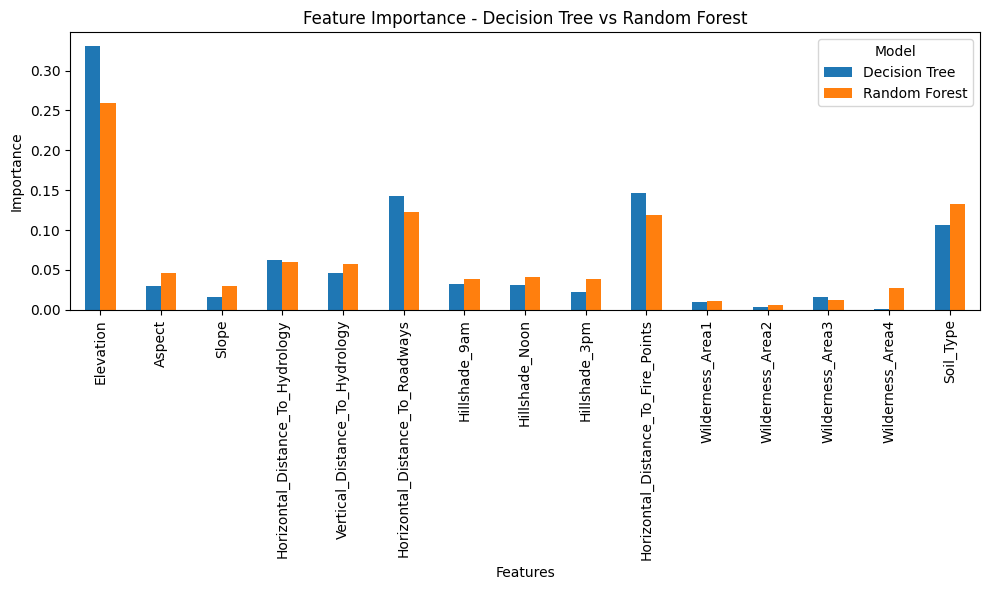

In [16]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Decision Tree': model1.feature_importances_,
    'Random Forest': model2.feature_importances_
})
importance_df = importance_df.set_index('Feature')
importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance - Decision Tree vs Random Forest')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

In [17]:
model3 = DecisionTreeClassifier(criterion='entropy',max_depth=220,splitter='best')
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
accuracy_score(y_test,y_pred3)

0.9378614374885258

In [18]:
model4 = RandomForestClassifier(n_estimators=200,criterion='entropy')
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)
accuracy_score(y_test,y_pred4)

0.9591231411786304

In [20]:
performance = pd.DataFrame({
    'Models' : ['Decision Tree', 'Random Forest'],
    'accuracy %': [accuracy_score(y_test,y_pred1)*100, accuracy_score(y_test,y_pred2)*100],
    'roc score': [roc_auc_score(y_test, y_pred_proba1, multi_class="ovo"),roc_auc_score(y_test, y_pred_proba2, multi_class="ovo")]
})
performance

,Models,accuracy %,roc score
0,Decision Tree,93.274394,0.935974
1,Random Forest,95.601363,0.997417
